Example

In [6]:
# import necessary libraries for data analysis and visualization in Python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# import bitcoin and ether data 

df = pd.read_csv(
    'data/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [8]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<Axes: xlabel='Timestamp'>

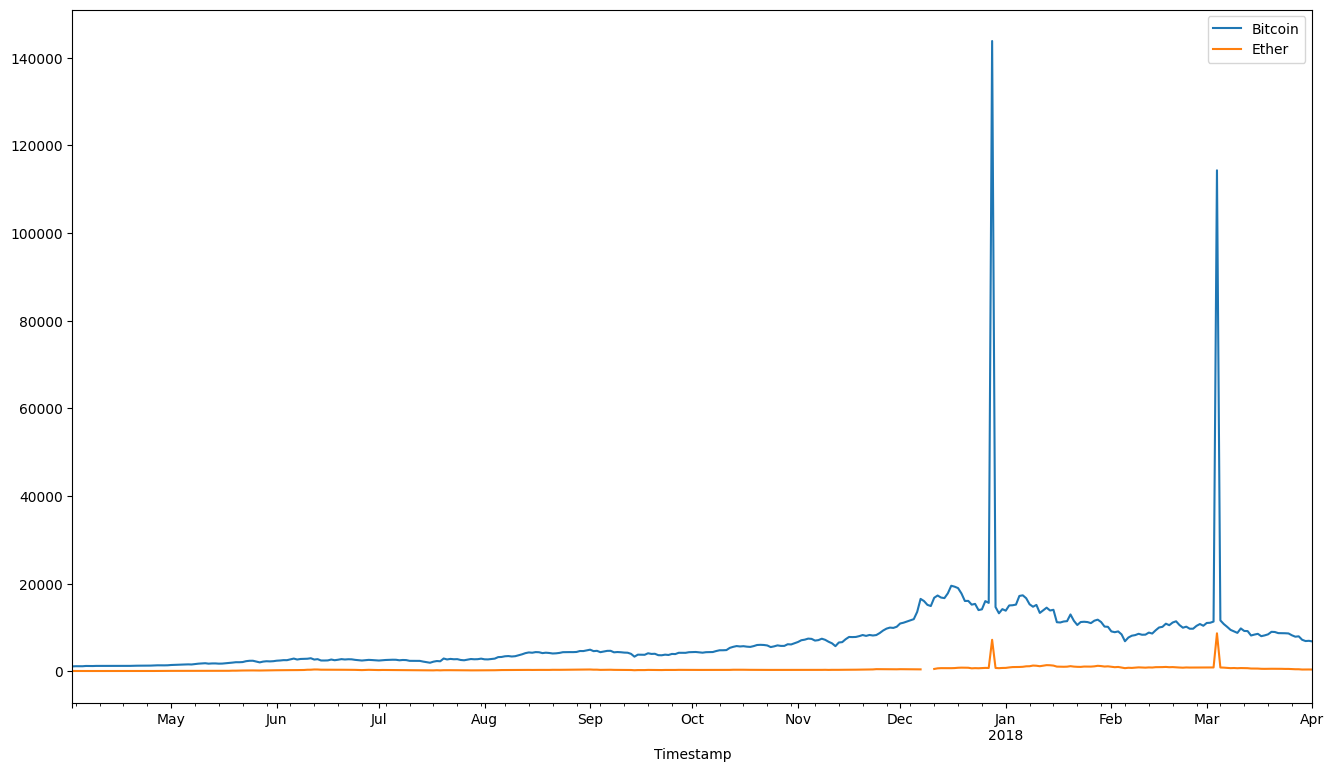

In [9]:
# run simple visualization 

df.plot(figsize=(16, 9))

<Axes: xlabel='Timestamp'>

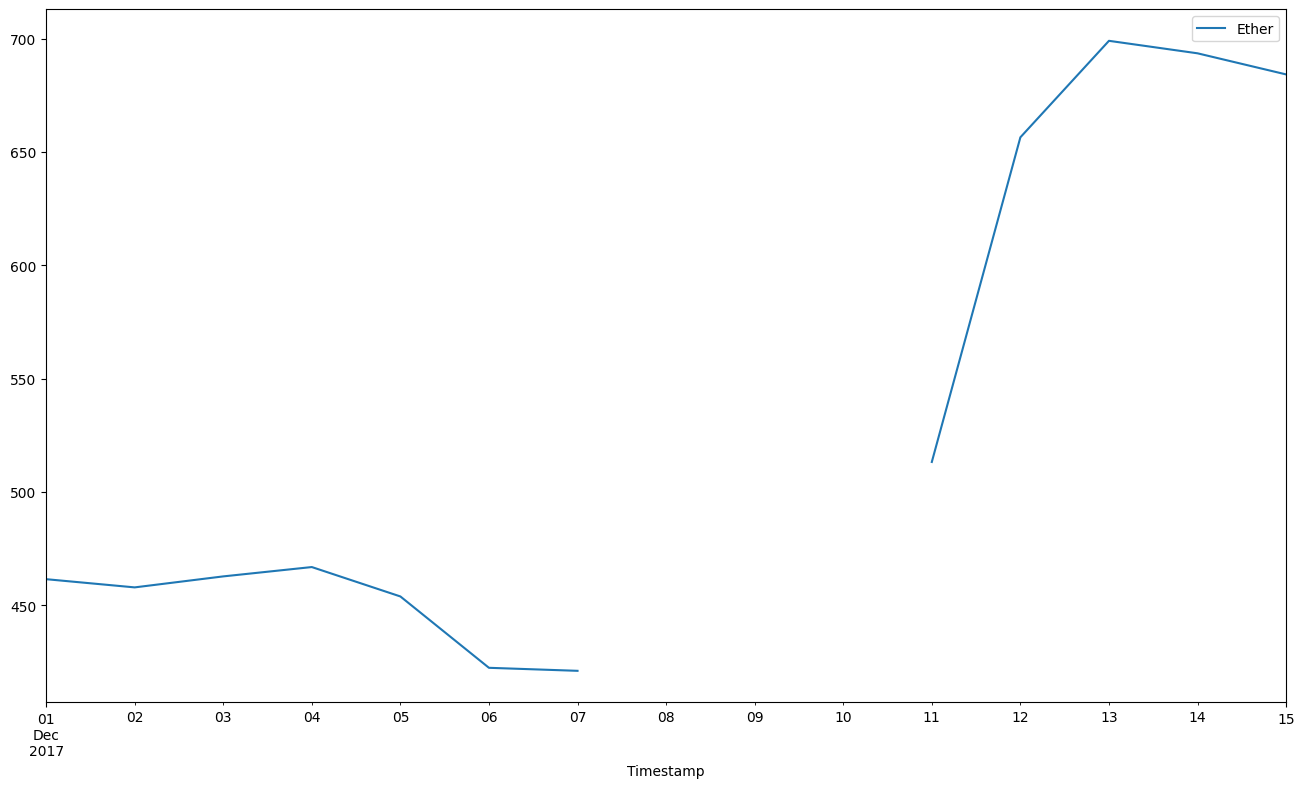

In [10]:
#  can see invalid values
# both ETH and BTC have huge spikes
# there seems to be some data missing in Ether between December 2017 and and January 2018

df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))  # "zoom in" to the missing data dates

In [12]:
df_na = df.loc['2017-12': '2017-12-15']

In [13]:
# Are those null values?

df_na['Ether'].isna().values.any()

# True = yes null 

True

In [14]:
# check when/what periods of time

df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [15]:
# add  more context:

df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [16]:
# use the previous value to fill missing values and just assume the price stayed the same

df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/33857168.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [17]:
df.fillna(method='bfill', inplace=True)

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


<Axes: xlabel='Timestamp'>

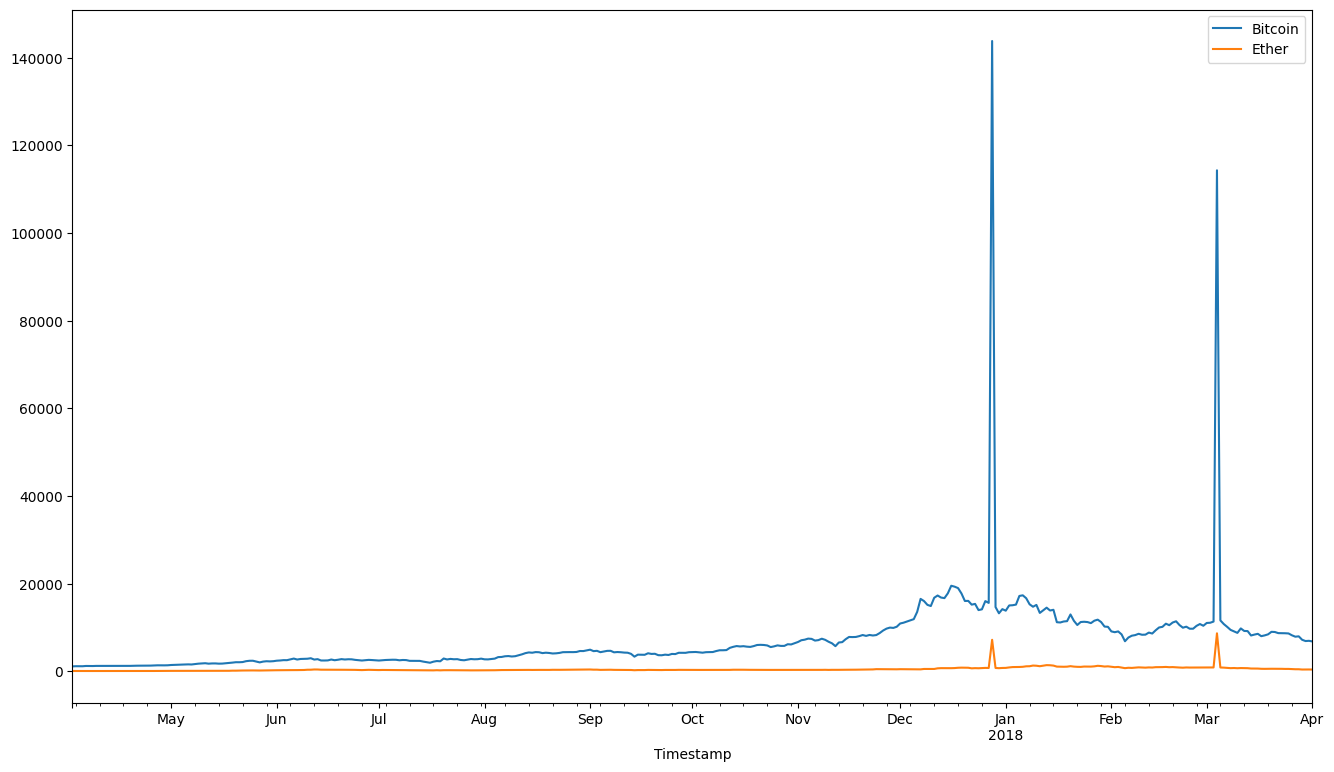

In [18]:
df.plot(figsize=(16, 9))

<Axes: xlabel='Timestamp'>

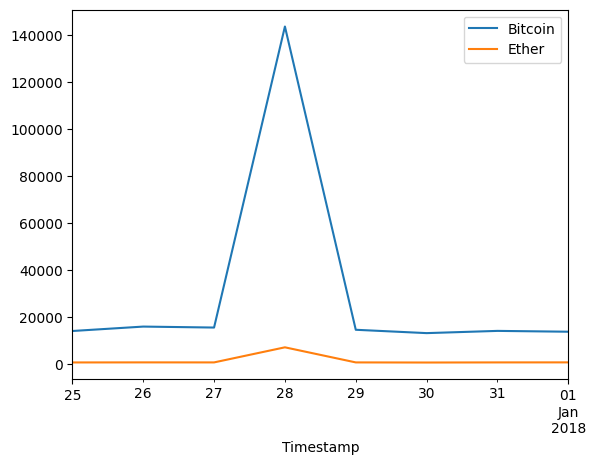

In [19]:
# fix the huge spikes
# first step -> identifying them visually
#            -> spikes seem to be located in the last 10 days of Dec 2017 and first of March 2018

df['2017-12-25':'2018-01-01'].plot()

<Axes: xlabel='Timestamp'>

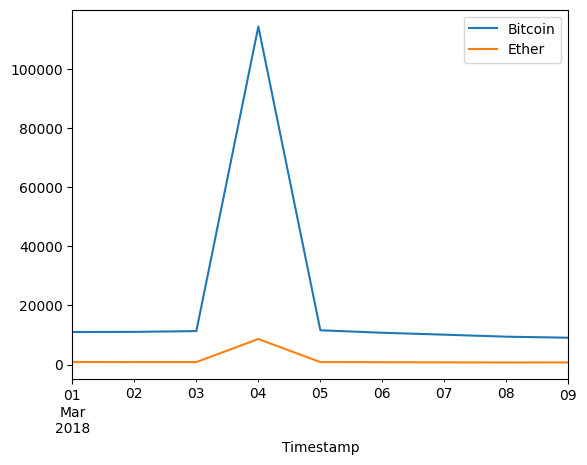

In [20]:
df['2018-03-01': '2018-03-09'].plot()

In [21]:
# according to plot, spikes are located in '2017-12-28' and '2018-03-04':

df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
# remove specified rows 

<Axes: xlabel='Timestamp'>

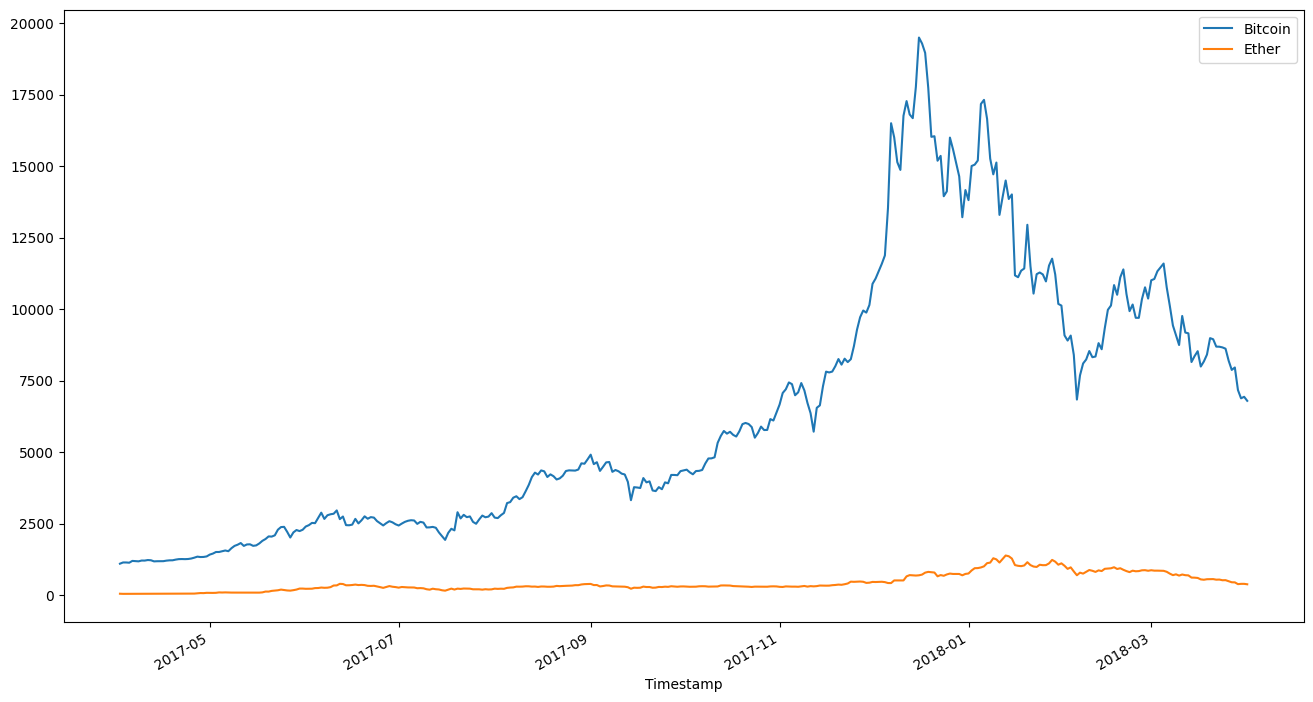

In [22]:
df_cleaned.plot(figsize=(16, 9))

# figure size set to 16 in width by 8 in height


Cleaning Analysis
    - Visuals help make sense of data and judge if analysis is on right track
    - BUT, with more powerful data -> analysis is a powerful method that helps
    - Analytic methods
        - Identify outliers /spikes /skewed values

Central Tendency 
    - Common set of indicators will be used to measure central tendency and identify outliers
    - mean
        - most common and popular one 
        - really sensitive to outliers

In [23]:
# mean of dataset with invalid numbers is: 

df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [24]:
# df.mean() results in high numbers for both bitcoin and ether
# due to outliers skewing with mean

df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [25]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

Visualizing Code
    - Use charts before + Seaborn to visualize distribution of values 
    - Scenario: Interested in histogram 

<Axes: ylabel='Frequency'>

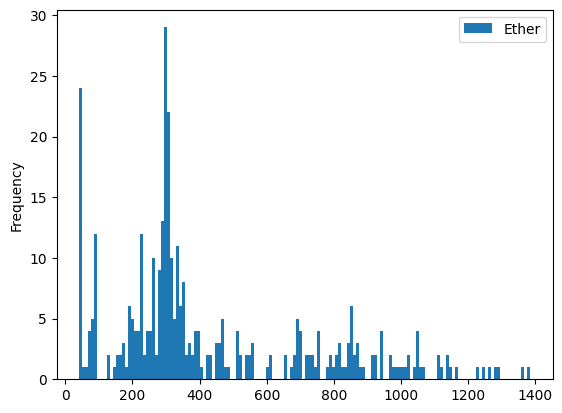

In [26]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)